In [1]:
import numpy as np

import matplotlib.pyplot as plt

import healpy as hp

import pathlib

import os

In [2]:
import healpy as hp

In [3]:
import sys
sys.path.append('../itfgs/')

version = 'fg'

from itfgs.params import SOSehgalfgs as SO

/global/homes/o/omard/.conda/envs/lenscarf/lib/python3.8/site-packages/plancklens/utils.py:317: RuntimeWarning: invalid value encountered in divide
  cls[k][ell[idc]] = cols[i + 1][idc] / (w[idc] if not grad_mode else 1.)
/global/homes/o/omard/.conda/envs/lenscarf/lib/python3.8/site-packages/plancklens/utils.py:323: RuntimeWarning: invalid value encountered in divide
  cls['pp'][ell[idc]] = cols[5][idc] / wpp(ell[idc])
/global/homes/o/omard/.conda/envs/lenscarf/lib/python3.8/site-packages/plancklens/utils.py:324: RuntimeWarning: invalid value encountered in divide
  cls['pt'][ell[idc]] = cols[6][idc] / wptpe(ell[idc])
/global/homes/o/omard/.conda/envs/lenscarf/lib/python3.8/site-packages/plancklens/utils.py:325: RuntimeWarning: invalid value encountered in divide
  cls['pe'][ell[idc]] = cols[7][idc] / wptpe(ell[idc])


## CMB level plots

In [4]:
Simulationsdir = pathlib.Path(os.environ['SCRATCH'])/'SKYSIMS/SEHGALSIMS/'

temperature_file = 'CMB_PS_healpix_Nside4096_DeltaT_uK_SimLensCMB.txt'

temperature_el, temperature_cl = np.loadtxt(Simulationsdir/temperature_file, unpack = True)

In [5]:
tlm_map = SO.sims_cmb_len.get_sim_tlm(0)

tlm_map_fg = SO.sims_cmb_len.get_sim_tlm(1)

Alternative tlm!! idxcmb 0
Alternative tlm!! idxcmb 0


In [6]:
cls_len = SO.cls_len
cls_unl = SO.cls_unl
tt = cls_len['tt']

pp = cls_unl['pp']

In [7]:
fgs = SO.fgs

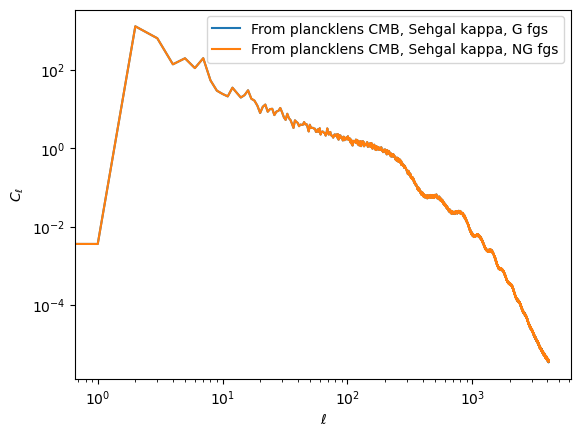

In [8]:
plt.loglog(hp.alm2cl(tlm_map), label = 'From plancklens CMB, Sehgal kappa, G fgs')
plt.loglog(hp.alm2cl(tlm_map_fg), label = 'From plancklens CMB, Sehgal kappa, NG fgs')
plt.ylabel(r'$C_\ell$')
plt.xlabel(r'$\ell$')
plt.legend()

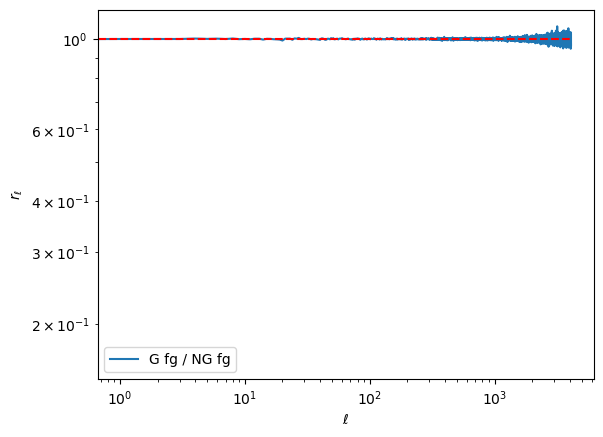

In [9]:
plt.loglog(hp.alm2cl(tlm_map)/hp.alm2cl(tlm_map_fg), label = 'G fg / NG fg')

plt.loglog(np.arange(0, 4000), np.ones(4000), 'r--')
plt.ylabel(r'$r_\ell$')
plt.xlabel(r'$\ell$')
plt.legend()

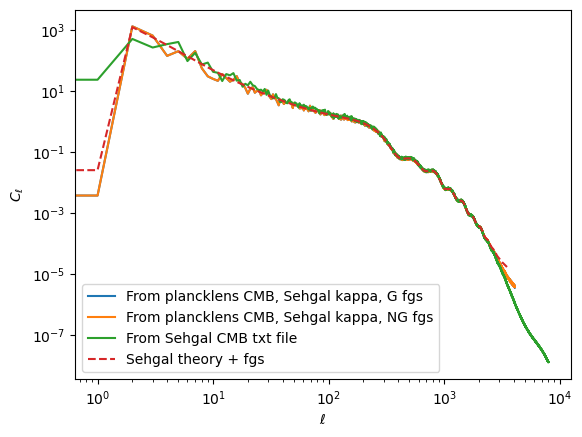

In [10]:
plt.loglog(hp.alm2cl(tlm_map), label = 'From plancklens CMB, Sehgal kappa, G fgs')
plt.loglog(hp.alm2cl(tlm_map_fg), label = 'From plancklens CMB, Sehgal kappa, NG fgs')
plt.loglog(temperature_el, temperature_cl, label = 'From Sehgal CMB txt file')
plt.loglog(tt[:len(fgs)]+fgs, label = 'Sehgal theory + fgs', ls = '--')
plt.ylabel(r'$C_\ell$')
plt.xlabel(r'$\ell$')
plt.legend()

## Plot QE reconstruction

In [11]:
from plancklens.qcinv.util_alm import alm_copy as palm_copy

In [12]:
plm_map = SO.sims_cmb_len.get_sim_plm(0) #This is the potential map coming from the lensing convergence map

plm_mapfg = SO.sims_cmb_len.get_sim_plm(1) #This is the potential map coming from the lensing convergence map


In [14]:
SO.TEMP = '/global/cscratch1/sd/omard/n32/SOSehgalfgs/lenscarfrecs'

In [17]:
from lenscarf.iterators import statics

plms = np.load(f'{SO.TEMP}/ptt_sim0000{version}/normalized_phi_plm_it000.npy')

plmsfg = np.load(f'{SO.TEMP}/ptt_sim0001{version}/normalized_phi_plm_it000.npy')

p2k = np.arange(4001) * np.arange(1, 4002) * 0.5

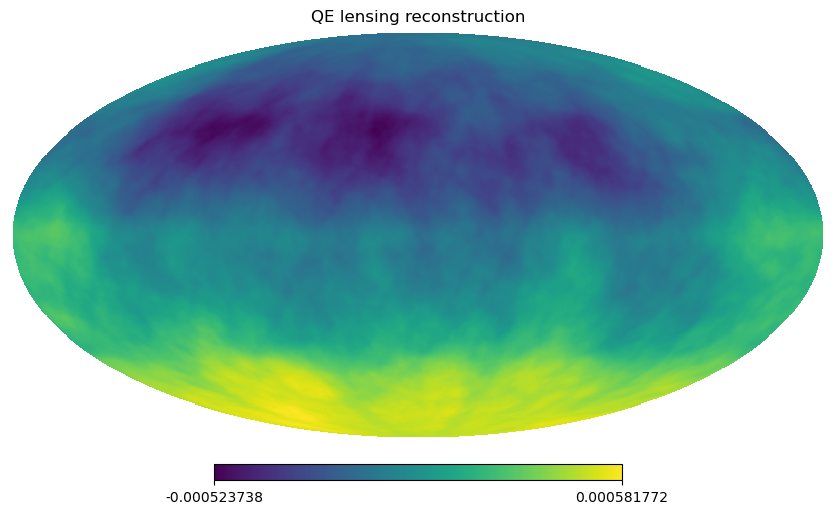

In [16]:
hp.mollview(hp.alm2map(plms, 4096, verbose = False), title = 'QE lensing reconstruction')

In [18]:
plm_in = palm_copy(plm_map, lmax = SO.lmax_phi) #GF input postborn + NL map
auto_in = hp.alm2cl(plm_in)

plm_infg = palm_copy(plm_mapfg, lmax = SO.lmax_phi) #GF input postborn + NL map
auto_infg = hp.alm2cl(plm_infg)


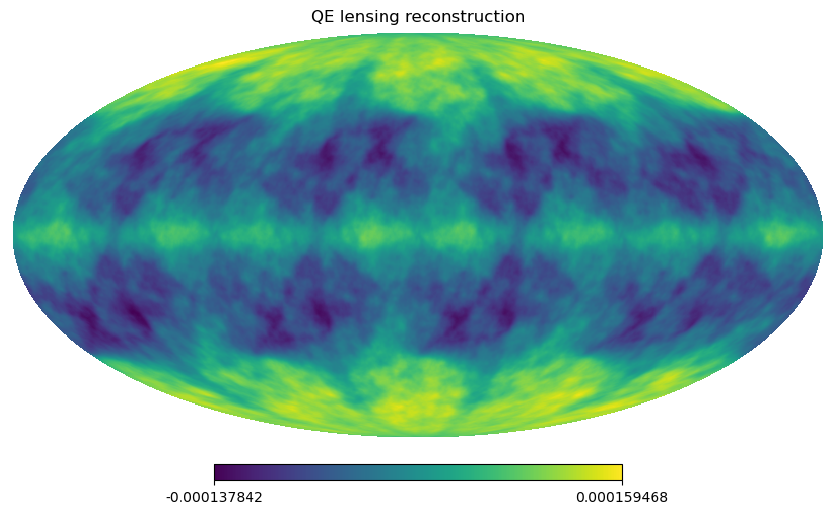

In [19]:
hp.mollview(hp.alm2map(plm_in, 4096, verbose = False), title = 'QE lensing reconstruction')

In [25]:
cross =  hp.alm2cl(plms, plm_in)

crossfg =  hp.alm2cl(plmsfg, plm_infg)

/tmp/ipykernel_38947/1259994253.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.loglog(auto_in/pp[:4001], label = 'Auto IN RAnd NG/Auto IN G')
/tmp/ipykernel_38947/1259994253.py:2: RuntimeWarning: invalid value encountered in divide
  plt.loglog(auto_in/pp[:4001], label = 'Auto IN RAnd NG/Auto IN G')
/tmp/ipykernel_38947/1259994253.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.loglog(auto_infg/pp[:4001], label = 'Auto IN NG/Auto IN G')
/tmp/ipykernel_38947/1259994253.py:3: RuntimeWarning: invalid value encountered in divide
  plt.loglog(auto_infg/pp[:4001], label = 'Auto IN NG/Auto IN G')


Text(0, 0.5, '$r_L$')

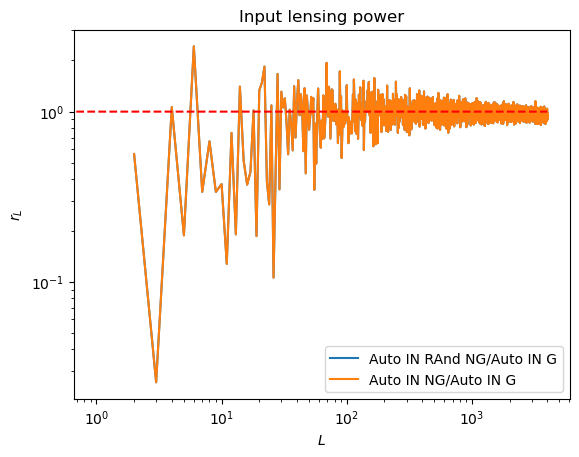

In [21]:
plt.title('Input lensing power')
plt.loglog(auto_in/pp[:4001], label = 'Auto IN RAnd NG/Auto IN G')
plt.loglog(auto_infg/pp[:4001], label = 'Auto IN NG/Auto IN G')
plt.loglog(np.arange(0, 4000), np.ones(4000), 'r--')


plt.legend()

plt.xlabel(r'$L$')
plt.ylabel(r'$r_L$')

Text(0, 0.5, '$C_L$')

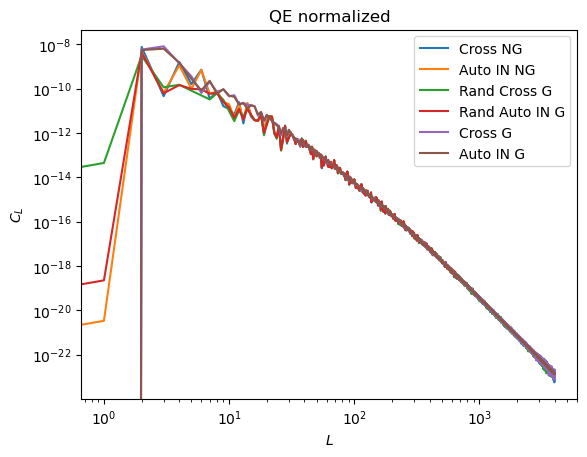

In [ ]:
plt.title('QE normalized')
plt.loglog(cross, label = 'Cross NG')
plt.loglog(auto_in, label = 'Auto IN NG')

plt.loglog(crossr, label = 'Rand Cross G')
plt.loglog(auto_inr, label = 'Rand Auto IN G')

plt.loglog(crossg, label = 'Cross G')
plt.loglog(auto_ing, label = 'Auto IN G')

plt.legend()

plt.xlabel(r'$L$')
plt.ylabel(r'$C_L$')

In [22]:
auto =  hp.alm2cl(plms, plms)

autofg =  hp.alm2cl(plmsfg, plmsfg)

/tmp/ipykernel_38947/1916289614.py:3: RuntimeWarning: invalid value encountered in divide
  rho = cross/np.sqrt(auto_in*auto)
/tmp/ipykernel_38947/1916289614.py:5: RuntimeWarning: invalid value encountered in divide
  rhofg = crossfg/np.sqrt(auto_infg*autofg)


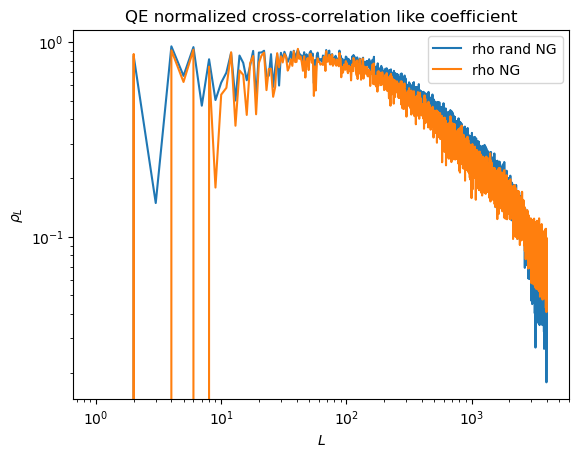

In [28]:
plt.title('QE normalized cross-correlation like coefficient')

rho = cross/np.sqrt(auto_in*auto)
#rhor = crossfg/np.sqrt(auto_inr*autor)
rhofg = crossfg/np.sqrt(auto_infg*autofg)

plt.loglog(rho, label = 'rho rand NG')
plt.loglog(rhofg, label = 'rho NG')

plt.xlabel(r'$L$')
plt.ylabel(r'$\rho_L$')

plt.legend()

In [57]:
from lenscarf.iterators import statics
plms = statics.rec.load_plms(f'{SO.TEMP}/ptt_sim0000{version}', [0, 1, 2])

plmsNG = statics.rec.load_plms(f'{SO.TEMP}/ptt_sim0001{version}', [0, 1, 2])



In [60]:
normalizations[0]

array([0.00000000e+000, 1.79769313e+308, 1.31104279e+000, ...,
       5.37250846e+002, 3.83834599e+002, 3.90797276e+002])

In [61]:

normalizations = [np.nan_to_num(auto_in/hp.alm2cl(mappa, plm_in)) for mappa in plms]
normplms = [hp.almxfl(plm, normalization) for plm, normalization in zip(plms, normalizations)]
normplmsNG = [hp.almxfl(plmNG, normalization) for plmNG, normalization in zip(plmsNG, normalizations)]


/tmp/ipykernel_38947/1744476836.py:1: RuntimeWarning: divide by zero encountered in divide
  normalizations = [np.nan_to_num(auto_in/hp.alm2cl(mappa, plm_in)) for mappa in plms]
/tmp/ipykernel_38947/1744476836.py:1: RuntimeWarning: invalid value encountered in divide
  normalizations = [np.nan_to_num(auto_in/hp.alm2cl(mappa, plm_in)) for mappa in plms]


In [72]:
normalizations

[array([0.00000000e+000, 1.79769313e+308, 1.31104279e+000, ...,
        5.37250846e+002, 3.83834599e+002, 3.90797276e+002]),
 array([ 0.00000000e+00, -5.03828160e+08,  1.78103943e+00, ...,
         5.67808114e+02,  4.14469879e+02,  3.94221996e+02]),
 array([ 0.00000000e+00, -1.65483518e+08,  1.05848662e+00, ...,
         5.84088937e+02,  4.30454860e+02,  3.94551422e+02])]

/tmp/ipykernel_38947/1897378392.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/norm)


Text(0.5, 0, '$L$')

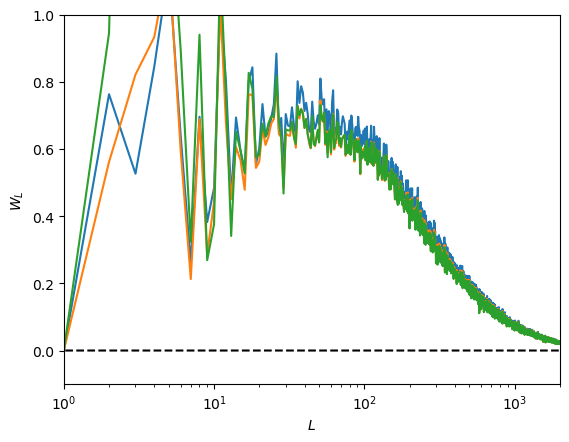

In [81]:
for norm in normalizations:
    plt.plot(1/norm)
plt.plot(norm*0+1, ls = '--', color = 'black')
plt.plot(norm*0, ls = '--', color = 'black')
plt.ylim(-0.1, 1)
plt.xlim(1, 2000)
plt.xscale('log')
plt.ylabel(r'$W_L$')
plt.xlabel(r'$L$')

/tmp/ipykernel_38947/3448027429.py:7: RuntimeWarning: invalid value encountered in divide
  curve = (autoNG-auto)/auto_in
/tmp/ipykernel_38947/3448027429.py:32: RuntimeWarning: invalid value encountered in divide
  curve = (autofg-auto)/auto_infg


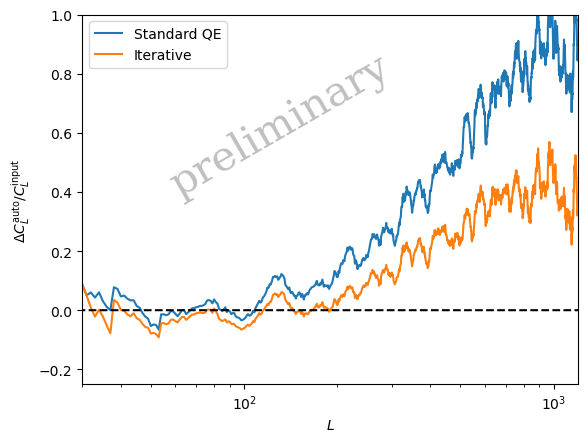

In [113]:
for i, c in enumerate(zip(normplms, normplmsNG)):

    plm, plmNG = c
    auto = hp.alm2cl(plm, plm)
    autoNG = hp.alm2cl(plmNG, plmNG)

    curve = (autoNG-auto)/auto_in

    label = 'Standard QE' if i == 0 else 'Iterative'
    if i in [0, 2]:
        plt.plot(savgol_filter(curve, 49, 3), label = label)


plt.text(0.4, 0.7, 'preliminary', ha = 'center', va = 'center', family = 'Serif',
            fontsize = 30, color = 'gray', alpha = 0.5, rotation = 30, transform=plt.gca().transAxes)

plt.plot(0.*auto_infg, ls = '--', color = 'black')

plt.legend()

plt.ylim(-0.25, 1)

plt.xlim(30, 1200)
plt.xscale('log')



plms = np.load(f'{SO.TEMP}/ptt_sim0000{version}/normalized_phi_plm_it000.npy')
plmsfg = np.load(f'{SO.TEMP}/ptt_sim0001{version}/normalized_phi_plm_it000.npy')
auto =  hp.alm2cl(plms, plms)
autofg =  hp.alm2cl(plmsfg, plmsfg)
curve = (autofg-auto)/auto_infg
#plt.plot(savgol_filter(curve, 49, 3), ls = '--')

plt.ylabel(r'$\Delta C^{\rm{auto}}_L / C_L^{\rm{input}}$')
plt.xlabel(r'$L$')

plt.savefig('bias.png', dpi = 300)

/tmp/ipykernel_38947/1712264472.py:6: RuntimeWarning: invalid value encountered in divide
  curve = (autofg-auto)/auto_infg


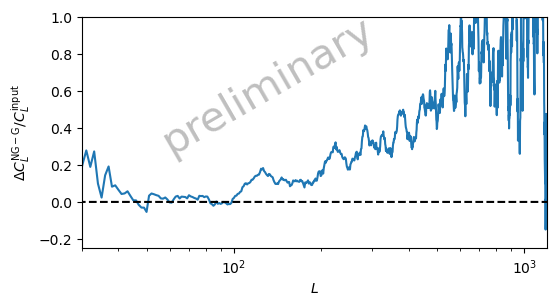

In [107]:
from scipy.signal import savgol_filter

plt.subplots(figsize = (6, 3))


curve = (autofg-auto)/auto_infg

#plt.plot(curve)

plt.text(0.4, 0.7, 'preliminary', ha = 'center', va = 'center',
            fontsize = 30, color = 'gray', alpha = 0.5, rotation = 30, transform=plt.gca().transAxes)

curve = (autofg-auto)/auto_infg
plt.plot(savgol_filter(curve, 49, 3), ls = '-')

plt.plot(0.*auto_infg, ls = '--', color = 'black')

plt.ylim(-0.25, 1)

plt.xlim(30, 1200)
plt.xscale('log')

plt.ylabel(r'$\Delta C^{\rm{NG-G}}_L / C_L^{\rm{input}}$')
plt.xlabel(r'$L$')

#plt.savefig('bias.png', dpi = 300)

## Iterative Reconstruction